## California Electric Vehicle Registration EXECUTIVE SUMMARY

### Introduction
In this notebook I will analyze electric vehicle registration in California. My hypothesis is that there will be higher rates of battery-powered vehicle registration in zip codes with higher median annual incomes. To do this, I acquired two datasets from the California state government. Below, we'll test my hypothesis and further explore what revelations this data reveals.

### Data Explained

Link to first dataset: https://data.ca.gov/dataset/personal-income-tax-statistics-by-zip-code/resource/7091fcca-e695-49ab-aa44-6e0c6f49c9c1

Link to second dataset: https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/d304108a-06c1-462f-a144-981dd0109900

The first dataset provided data on vehicle registrations, make, and model; as well as type of fuel - including gas, diesel, hybrid, and battery-electric. The second dataset contained data on number of tax filings, annual gross income, total tax liability, etc. Both datasets had columns of data that were unnecessary for the analysis, like make/model, heavy/light duty, model year, etc., so those columns were dropped; and then the datasets were combined into a single frame. Once joined, because the median annual gross income (AGI) was not provided in either set, this was calculated with the AGI per tax filing, per zip code. 

See data dictionary below:

In [23]:
df = pd.DataFrame(EVsAndIncome.dtypes,columns=['Type'])
df['Description']=['California Zip Code','Number of Tax Returns Filed','California Annual Gross Income','Total Tax Liability for Zip Code','Number of Electric Vehicles','Average Annual Gross Income per Tax Return']
df[['Description','Type']]

,Description,Type
Zip Code,California Zip Code,int64
Returns,Number of Tax Returns Filed,int64
CA AGI,California Annual Gross Income,int64
Total Tax Liability,Total Tax Liability for Zip Code,int64
Battery Electric Vehicles,Number of Electric Vehicles,int64
Average AGI/TaxReturn,Average Annual Gross Income per Tax Return,float64


### Results

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

EVsAndIncome = pd.read_excel('EVsAndIncome.xlsx')
EVsAndIncome.head()

,Zip Code,Returns,CA AGI,Total Tax Liability,Battery Electric Vehicles,Average AGI/TaxReturn
0,96047,297,16491335,558545,1,55526.38
1,92022,416,27534314,1314928,1,66188.25
2,95117,13881,1362064173,73703746,16,98124.36
3,95036,541,43632815,1982815,1,80652.15
4,95355,25579,1664582060,60683658,10,65076.12


The average annual gross income per tax return was calculated by dividing "CA AGI" by "Returns." As shown above, a new column featuring that metric was added to the dataset. Below, the first scatterplot reveals the result of testing the hypothesis that the number of registered electric vehicles (by zip code) would increase as average annual income increased. There is indeed a higher number of electric vehicles as incomes are higher, though perhaps not to the extent expected.

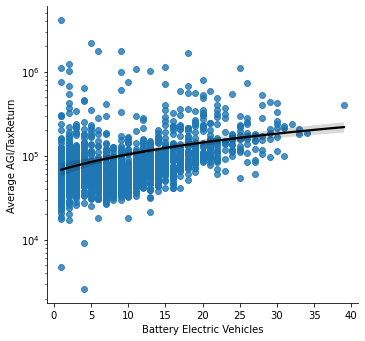

In [25]:
grid = sns.lmplot(data=EVsAndIncome,x = 'Battery Electric Vehicles',y = 'Average AGI/TaxReturn',line_kws={'color': 'black'})
grid.set(yscale="log")

The two scatterplots below illustrate how the number of electric vehicles increases as total tax liabiilty, and annual gross income for a zip code increases. While these are related to the above plot, they show a more dramatic rise in electric vehicles. This could indicate that the overall wealth of a zip code has a more significant effect on the number of battery-powered vehicles than does average income. 

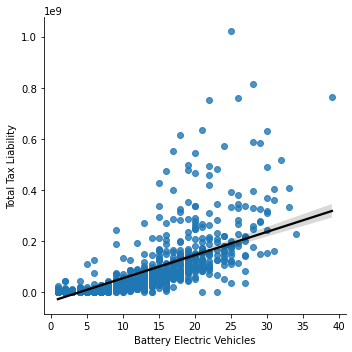

In [26]:
sns.lmplot(data=EVsAndIncome,x = 'Battery Electric Vehicles',y = 'Total Tax Liability',line_kws={'color': 'black'})

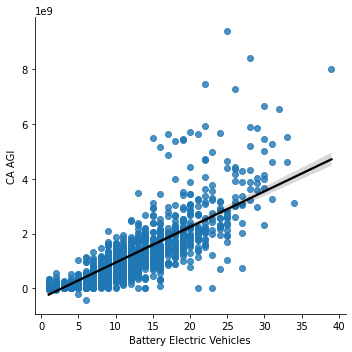

In [27]:
grid = sns.lmplot(data=EVsAndIncome,x = 'Battery Electric Vehicles',y = 'CA AGI',line_kws={'color': 'black'})

The below distribution plot represents totals of electric vehicles as bins, and reveals which bins are most common among zip codes. Each zip code had at least one electric vehicle: notice the x-axis "0" has no bar. 

<AxesSubplot:xlabel='Battery Electric Vehicles'>

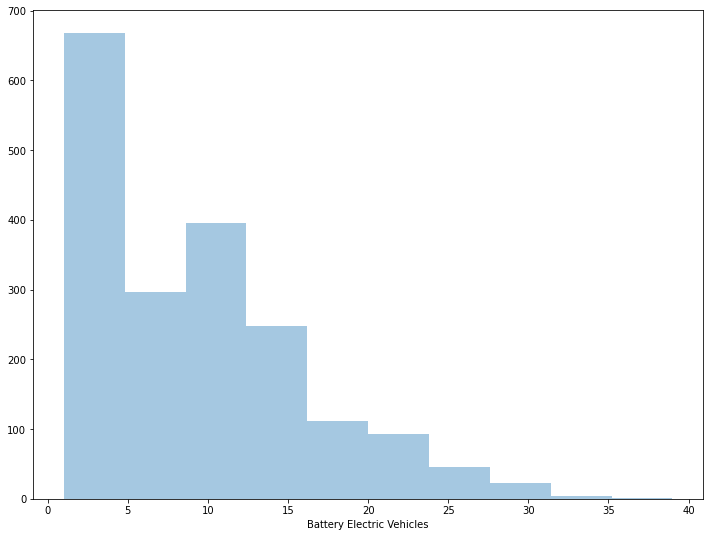

In [29]:
f, ax = plt.subplots(figsize=(12,9))

sns.distplot(EVsAndIncome['Battery Electric Vehicles'],kde=False,bins=10)

The below heat map reveals the strength and weakness of the correlations between the various types of data. It reinforces the second two scatterplots by showing hues of orange/red representing stronger correlations between battery electric vehicles and average annual income and total tax liability. The light blues to dark blues represent weaker correlations, though still some correlation.

<AxesSubplot:>

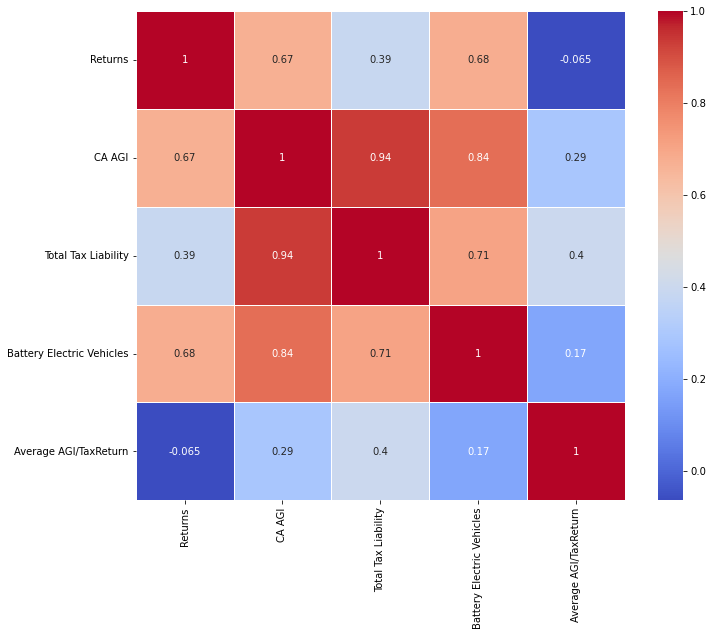

In [28]:
columns = EVsAndIncome.columns[1:6]
df_corr = EVsAndIncome[columns]

corrmat = df_corr.corr()

f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,square=True,annot=True,cmap='coolwarm',linewidths=.5)

The below code converts the zip codes into counties and the counties into FIPS, so that the data can be actually mapped to zip codes and for the creation of categorical data for use in a boxplot.

In [33]:
import addfips

from uszipcode import SearchEngine
search = SearchEngine()

def zco(x):
    city = search.by_zipcode(x).county
    return city if city else 'None'

def get_fips(x):
    af = addfips.AddFIPS()
    fips = af.get_county_fips(x, state='California')
    return fips

EVsAndIncome['Counties'] = EVsAndIncome['Zip Code'].apply(zco)
EVsAndIncome['FIPS']=EVsAndIncome['Counties'].apply(get_fips)

EVsAndIncome

,Zip Code,Returns,CA AGI,Total Tax Liability,Battery Electric Vehicles,Average AGI/TaxReturn,Counties,FIPS
0,96047,297,16491335,558545,1,55526.38,Shasta County,06089
1,92022,416,27534314,1314928,1,66188.25,San Diego County,06073
2,95117,13881,1362064173,73703746,16,98124.36,Santa Clara County,06085
3,95036,541,43632815,1982815,1,80652.15,Santa Clara County,06085
4,95355,25579,1664582060,60683658,10,65076.12,Stanislaus County,06099
...,...,...,...,...,...,...,...,...
1881,90017,9933,747190649,45793835,15,75223.06,Los Angeles County,06037
1882,95692,2043,130131494,4553717,4,63696.28,Yuba County,06115
1883,92117,26357,1909543664,82407461,19,72449.20,San Diego County,06073
1884,94511,830,48899459,1779150,6,58915.01,Contra Costa County,06013


The below code is specifically what creates the mapping of battery electric vehicles to counties in California. The darker orange and red hues indicate higher numbers of electric vehicles, while yellows/greens/blues indicate lower numbers. As illustrated in the map, the highest concentration of electric vehicles is in the San Franciso Bay Area, The Los Angeles County area, and the San Diego area. As we look north and inland, the number of electric vehicles is comparatively low.

In [20]:
import plotly.express as px

from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

fig = px.choropleth(EVsAndIncome, geojson=counties, locations='FIPS', color='Battery Electric Vehicles',
                           color_continuous_scale="Jet",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'Counties':'Counties'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

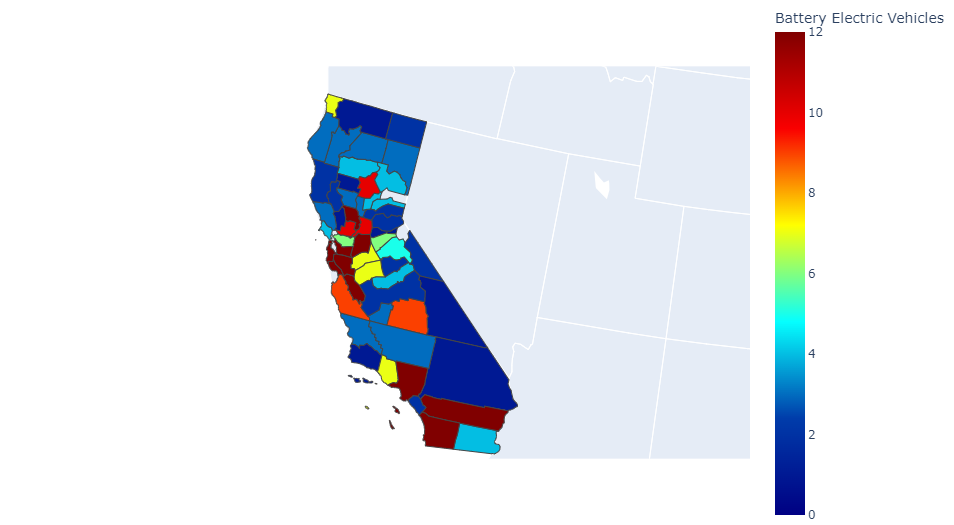

The below code creates a barplot for each California county, and illustrates the mean and range and outliers for the number of electric vehicles registered in each county.

[Text(0, 0, 'Shasta County'),
 Text(1, 0, 'San Diego County'),
 Text(2, 0, 'Santa Clara County'),
 Text(3, 0, 'Stanislaus County'),
 Text(4, 0, 'Los Angeles County'),
 Text(5, 0, 'Humboldt County'),
 Text(6, 0, 'San Bernardino County'),
 Text(7, 0, 'Sacramento County'),
 Text(8, 0, 'Ventura County'),
 Text(9, 0, 'Kern County'),
 Text(10, 0, 'Orange County'),
 Text(11, 0, 'Contra Costa County'),
 Text(12, 0, 'Imperial County'),
 Text(13, 0, 'Sonoma County'),
 Text(14, 0, 'Alameda County'),
 Text(15, 0, 'San Francisco County'),
 Text(16, 0, 'Fresno County'),
 Text(17, 0, 'Lake County'),
 Text(18, 0, 'Marin County'),
 Text(19, 0, 'Plumas County'),
 Text(20, 0, 'Merced County'),
 Text(21, 0, 'Tuolumne County'),
 Text(22, 0, 'Napa County'),
 Text(23, 0, 'Riverside County'),
 Text(24, 0, 'San Joaquin County'),
 Text(25, 0, 'Santa Barbara County'),
 Text(26, 0, 'Del Norte County'),
 Text(27, 0, 'El Dorado County'),
 Text(28, 0, 'Mendocino County'),
 Text(29, 0, 'San Mateo County'),
 Text(30, 

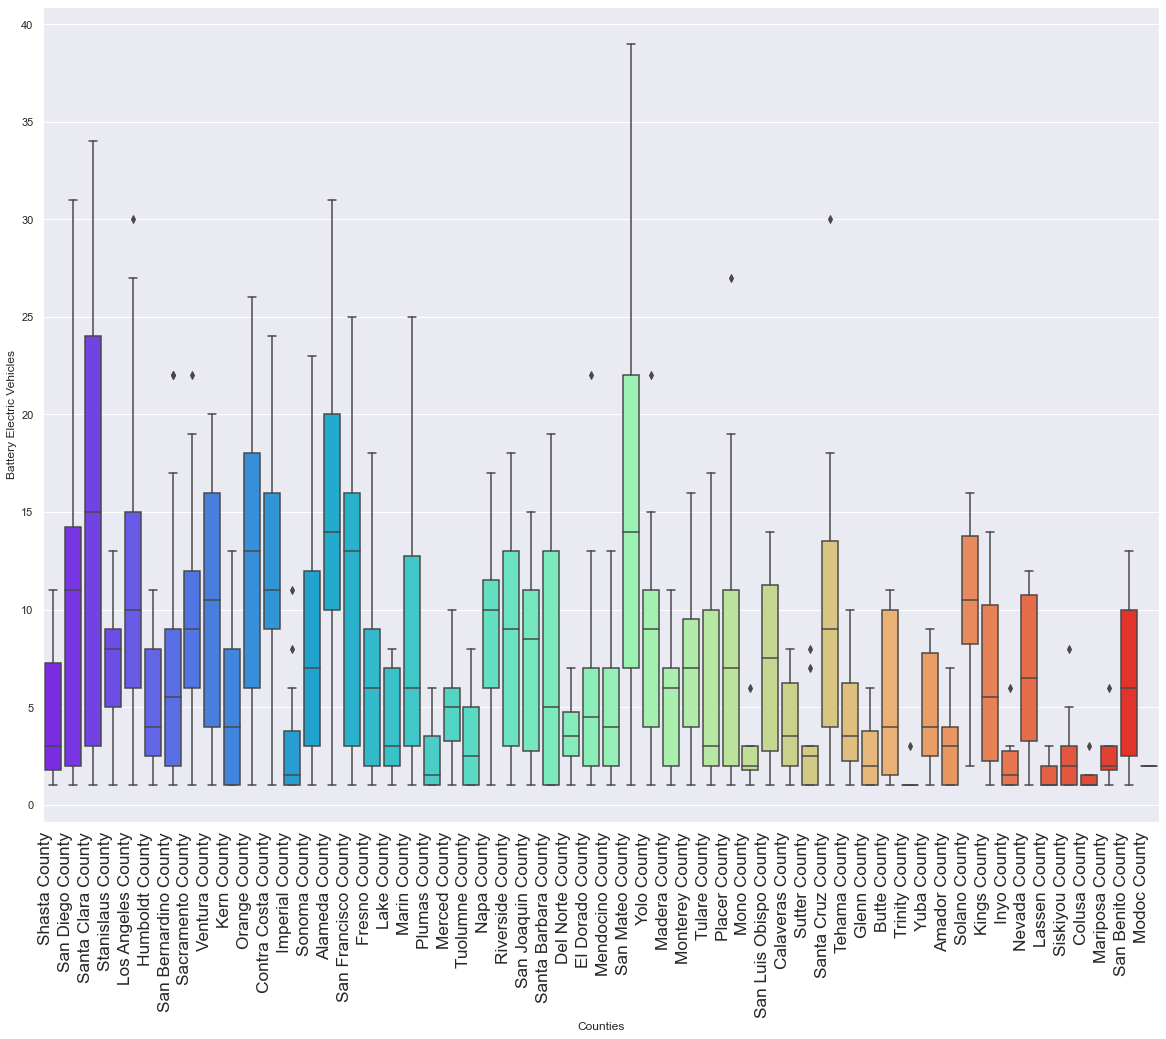

In [24]:
sns.set(rc={'figure.figsize':(20,15)})
ax=sns.boxplot(x="Counties", y="Battery Electric Vehicles", data=EVsAndIncome,palette='rainbow')
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
    
)


### Summary
In all, the analysis did indeed reveal a correlation between income in an area, both zip code and county. While there was a positive correlation between average annual income (based on filed tax returns), it was perhaps not as strong as expected. There were stronger positive correlations between the number of registered electric vehicles and total tax liability, and annual gross income, for an entire zip code. This could indicate that wealthier areas have higher rates of electric vehicle adoption. However, further analysis may lead to more predictive results, as the plots here could also indicate a positive correlation between population density and the number of electric vehicles. Population density vs the number of battery-electric vehicle registrations would be my suggestion for future analysis.